
<div style="background-color:#cbfefb; padding:30px; border-radius: 10px; 
  border: 2px solid black; 
  padding: 20px;">
    <h1 style="color:#2d7ff9;text-align:center;" >UpGrad Hackathon Challenge </h1>
</div>


# Problem Statement 

## This hackathon aims to create innovative solutions that enhance product categorization efficiency, accuracy, and scalability.Develop a multi-class text classifier that categorizes products with maximum accuracy based on the given dataset. 


# Importing Necessary Libraaries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from transformers import AutoTokenizer
!pip install scikit-plot
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import requests
from transformers import AutoTokenizer

import warnings

# Filter out warnings from a specific module (e.g., FutureWarning from numpy)
warnings.filterwarnings("ignore", category=FutureWarning, module="numpy")


import nltk
nltk.download('stopwords')
nltk.download('punkt')

import re
import string

from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize as nltk_sent_tokenize
from nltk.tokenize import word_tokenize as nltk_word_tokenize

from sklearn.feature_extraction.text import CountVectorizer , TfidfTransformer
import numpy as np
from nltk.corpus import stopwords

from scipy.spatial.distance import cosine


from nltk.corpus import stopwords

# Download the stopwords list if you haven't already
import nltk
nltk.download('stopwords')

# Get the English stopwords list

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akaur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akaur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data loading

In [3]:
df = pd.read_csv(r"C:\Users\akaur\Downloads\train_product_data.csv")

In [4]:
df.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


## DATASET DESCRIPTION 

 ### 1. uniq_id: 
   - Description: A unique identifier for each product.
   - Purpose: Acts as the primary key to distinguish each product record uniquely.

 ### 2. crawl_timestamp: 
   - Description: The timestamp when the product data was last scraped or collected.
   - Purpose: Helps identify the data's recency and track changes over time.

 ### 3. product_url: 
   - Description: The URL linking directly to the product's page on the eCommerce platform.
   - Purpose: Allows direct access to the product's information and purchasing page.

 ### 4. product_name: 
   - Description: The name or title of the product as displayed on the eCommerce platform.
   - Purpose: Provides a searchable and readable identification of the product.

 ### 5. product_category_tree: 
   - Description: The hierarchical structure representing the product's category on the platform.
   - Purpose: Useful for categorization, analysis, and filtering of products.

 ### 6. pid: 
   - Description: A unique identifier specific to the eCommerce platform for each product.
   - Purpose: Used to reference products internally on the platform.

 ### 7. retail_price: 
   - Description: The original or retail price of the product before any discounts.
   - Purpose: Helps understand the product's standard market value.

 ### 8. discounted_price: 
   - Description: The price of the product after applying any discounts or offers.
   - Purpose: Reflects the final price a customer would pay.

 ### 9. image: 
   - Description: URL linking to the main image of the product.
   - Purpose: Provides visual representation for the product.

 ### 10. is_FK_Advantage_product: 
   - Description: A boolean indicator (True/False) showing if the product is part of Advantage program.
   - Purpose: Denotes if the product has additional benefits like faster delivery or special quality checks.

 ### 11. description: 
   - Description: Detailed information about the product, including features, specifications, and usage.
   - Purpose: Helps customers understand the product's value proposition and unique selling points.

 ### 12. product_rating: 
   - Description: The product's overall rating on the platform, based on customer reviews.
   - Purpose: Indicates customer satisfaction and product quality.

 ### 13. overall_rating: 
   - Description: The aggregate rating of the product across different platforms or periods.
   - Purpose: Offers a comprehensive view of the product's reception.

 ### 14. brand: 
   - Description: The name of the brand or manufacturer of the product.
   - Purpose: Assists in brand-based analysis and filtering.

 ### 15. product_specifications: 
   - Description: Detailed specifications of the product, often in JSON or structured format.
   - Purpose: Provides technical and functional details to aid customer decision-making.


# DATA OVERVIEW

Using the `head()` method to see the first five rows of the columns.

In [ ]:
df.head()

Finding the shape of the dataset.
It gives the number of rows and number of columns in the dataset.

In [6]:
df.shape

(14999, 15)

* Here we are going to take look at the names of the columns.<br>

* We can use the `columns()` method to see the list that contains names of the columns.<br>

In [ ]:
df.columns

Let's take small look at the datatype of the values of each colum.<br>

We can do it by using the `info()` method of the dataframe.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  14999 non-null  object 
 1   crawl_timestamp          14999 non-null  object 
 2   product_url              14999 non-null  object 
 3   product_name             14999 non-null  object 
 4   product_category_tree    14999 non-null  object 
 5   pid                      14999 non-null  object 
 6   retail_price             14942 non-null  float64
 7   discounted_price         14942 non-null  float64
 8   image                    14996 non-null  object 
 9   is_FK_Advantage_product  14999 non-null  bool   
 10  description              14998 non-null  object 
 11  product_rating           14999 non-null  object 
 12  overall_rating           14999 non-null  object 
 13  brand                    10289 non-null  object 
 14  product_specifications

As you can see, there are two columns with float values, one column with bool values, and twelve more columns with object type values.

## Performoimg Exploratory Data Analysis

### <a id='toc1_4_1'></a>[Find and handle the null values which are present in the dataset.](#toc0_)

You can check for the null values by method called as `isna()`.

</a>.



In [9]:
df.isna().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 57
discounted_price             57
image                         3
is_FK_Advantage_product       0
description                   1
product_rating                0
overall_rating                0
brand                      4710
product_specifications        6
dtype: int64

We're going to remove the rows that have null values.

### <a id='toc1_4_2_'></a>[Handling the Null values.](#toc0_)
* You can drop the rows by using the `dropna()` method of the padas dataframe.<br>
* Please make sure that you set the parameters of the method correctly. We have to delete only the rows, not whole columns, and a new updated dataset must replace the old one.<br>



In [11]:
df.dropna(inplace=True,axis=0) #droppinng the duplicated values.

In [12]:
df.shape

(10237, 15)

In [13]:
df.duplicated().sum()

0

The dataset contains no duplicate rows, as shown here. 

### <a id='toc1_4_4_'></a>[Count the numbers of  Unique values in each column in given dataset.](#toc0_)
#### Get the number of unique values for each column
* Here we are checking the null values for each columns. <br>
* Here we are using `nunique()` method to get the numbers od unique values in columns <br>




In [14]:
for i in df.columns:
    print(i,df[i].nunique())

uniq_id 10237
crawl_timestamp 237
product_url 10237
product_name 6464
product_category_tree 14
pid 10235
retail_price 1674
discounted_price 1804
image 9153
is_FK_Advantage_product 2
description 8959
product_rating 34
overall_rating 34
brand 2299
product_specifications 9885


In [15]:
df['product_name'].unique()

array(["Alisha Solid Women's Cycling Shorts", 'AW Bellies',
       'dilli bazaaar Bellies, Corporate Casuals, Casuals', ...,
       'BGS Alloy Charm Bracelet', 'Babes Brass Cuff',
       'Kenway Retail Brass Copper Cuff'], dtype=object)

In [16]:
df['product_rating'].unique()

array(['No rating available', '5', '3.6', '3', '4', '2.4', '3.3', '1',
       '3.8', '3.2', '3.5', '3.7', '2.3', '2', '3.9', '2.5', '2.7', '4.5',
       '4.7', '4.1', '4.4', '4.3', '3.4', '4.6', '4.2', '1.5', '2.8',
       '2.9', '4.9', '4.8', '2.2', '1.3', '1.8', '3.1'], dtype=object)

In [17]:
df['overall_rating'].unique()

array(['No rating available', '5', '3.6', '3', '4', '2.4', '3.3', '1',
       '3.8', '3.2', '3.5', '3.7', '2.3', '2', '3.9', '2.5', '2.7', '4.5',
       '4.7', '4.1', '4.4', '4.3', '3.4', '4.6', '4.2', '1.5', '2.8',
       '2.9', '4.9', '4.8', '2.2', '1.3', '1.8', '3.1'], dtype=object)

In [18]:
df['product_category_tree'].unique()

array(['Clothing ', 'Footwear ', 'Pens & Stationery ',
       'Bags, Wallets & Belts ', 'Home Decor & Festive Needs ',
       'Automotive ', 'Tools & Hardware ', 'Baby Care ',
       'Mobiles & Accessories ', 'Toys & School Supplies ', 'Jewellery ',
       'Kitchen & Dining ', 'Computers ', 'Watches '], dtype=object)

In [21]:
df['product_name'].value_counts()

product_name
S4S Stylish Women's Push-up Bra                                94
Voylla Metal, Alloy Necklace                                   66
DailyObjects Back Cover for Apple iPad 2/3/4                   52
S4S Comfortable Women's Full Coverage Bra                      45
Grafion by Grafion - Comfort Feel Women's Full Coverage Bra    44
                                                               ..
Beebay Baby Boy's Solid Casual Shirt                            1
Maveric Pleasing Single Breasted Solid Men's Suit               1
FAB-FLASH Fire Retrardant PVC 2.5 sq/mm Yellow 91 m Wire        1
Hangrr Premium Single Breasted Solid Men's Suit                 1
ETTI ESJ4 Glass Necklace                                        1
Name: count, Length: 6464, dtype: int64

In [22]:
df['product_category_tree'].value_counts()

product_category_tree
Jewellery                      3209
Clothing                       2689
Automotive                      935
Mobiles & Accessories           765
Home Decor & Festive Needs      646
Computers                       525
Tools & Hardware                375
Kitchen & Dining                326
Footwear                        268
Baby Care                       197
Pens & Stationery               126
Bags, Wallets & Belts            81
Toys & School Supplies           51
Watches                          44
Name: count, dtype: int64

In [23]:
df['product_rating'].value_counts()

product_rating
No rating available    9476
5                       277
4                        96
1                        76
3                        57
4.2                      28
2                        25
3.7                      21
4.5                      21
4.3                      17
3.5                      14
2.5                      12
4.1                      11
4.8                      11
3.6                      11
3.8                       9
2.3                       9
3.2                       8
3.9                       8
3.3                       7
4.7                       6
4.4                       6
3.4                       6
4.6                       4
2.4                       3
2.7                       3
2.8                       3
2.9                       3
4.9                       2
2.2                       2
3.1                       2
1.5                       1
1.3                       1
1.8                       1
Name: count, dtype: int64

In [24]:
df['brand'].value_counts()

brand
Allure Auto       468
Regular           307
Slim              284
Voylla            273
Karatcraft        211
                 ... 
Chinhhari Arts      1
LAMS                1
Samriddhivastu      1
Elephant            1
Babes               1
Name: count, Length: 2299, dtype: int64

In [26]:
df['product_name'].value_counts()

product_name
S4S Stylish Women's Push-up Bra                                94
Voylla Metal, Alloy Necklace                                   66
DailyObjects Back Cover for Apple iPad 2/3/4                   52
S4S Comfortable Women's Full Coverage Bra                      45
Grafion by Grafion - Comfort Feel Women's Full Coverage Bra    44
                                                               ..
Beebay Baby Boy's Solid Casual Shirt                            1
Maveric Pleasing Single Breasted Solid Men's Suit               1
FAB-FLASH Fire Retrardant PVC 2.5 sq/mm Yellow 91 m Wire        1
Hangrr Premium Single Breasted Solid Men's Suit                 1
ETTI ESJ4 Glass Necklace                                        1
Name: count, Length: 6464, dtype: int64

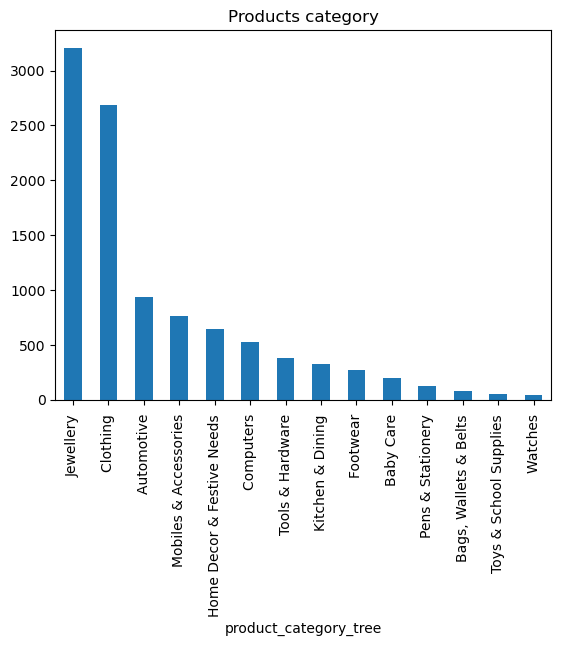

In [27]:
df.product_category_tree.value_counts().plot(kind='bar', title='Products category')
plt.show()

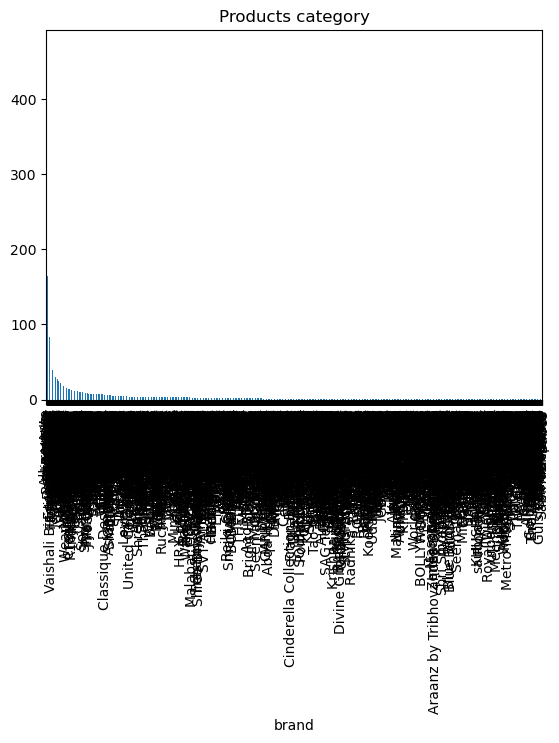

In [28]:
df.brand.value_counts().plot(kind='bar', title='Products category')
plt.show()

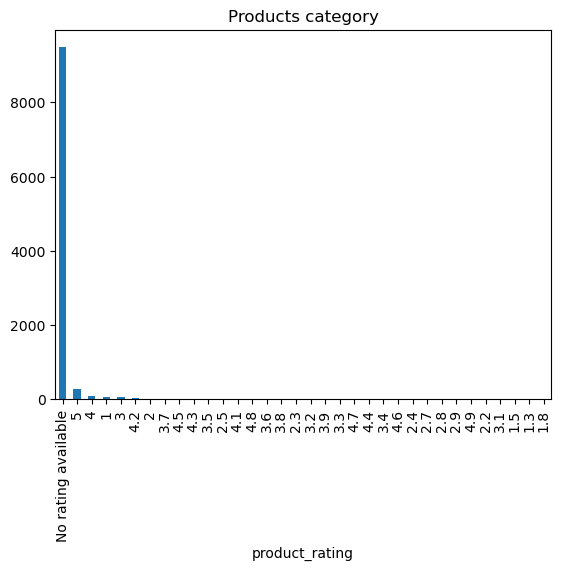

In [29]:
df.product_rating.value_counts().plot(kind='bar', title='Products category')
plt.show()

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
retail_price,10237.0,3908.512162,9095.250738,35.0,699.0,1095.0,2199.0,116292.0
discounted_price,10237.0,2616.727948,6973.566308,35.0,346.0,499.0,1275.0,116292.0


##### Here mean  retail_price is Rs 3900 with Standard Deviation of 9095 and mean  discounted_price is Rs 2600 with Standard Deviation of 6970

In [31]:
df.describe(include="object")

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,image,description,product_rating,overall_rating,brand,product_specifications
count,10237,10237,10237,10237,10237,10237,10237,10237,10237,10237,10237,10237
unique,10237,237,10237,6464,14,10235,9153,8959,34,34,2299,9885
top,c2d766ca982eca8304150849735ffef9,2015-12-01 12:40:44 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,S4S Stylish Women's Push-up Bra,Jewellery,JEAEGE8Q8GXYFTGU,"[""http://img6a.flixcart.com/image/car-mat/m/t/...",Fashion Jewellery Alloy Necklace - Buy Fashion...,No rating available,No rating available,Allure Auto,"{""product_specification""=>nil}"
freq,1,1508,1,94,3209,2,45,38,9476,9476,468,39


## Feature Selection 


In [34]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

### We can observe from above columns that only , 'description', 'product_specifications', 'product_category_tree', are columns of our interest for our Problem Statement .

## Feature Engineering

#### df ['product_category_tree'] is the Target columns that we need to predict .

In [35]:
df['product_category_tree'].unique()

array(['Clothing ', 'Footwear ', 'Pens & Stationery ',
       'Bags, Wallets & Belts ', 'Home Decor & Festive Needs ',
       'Automotive ', 'Tools & Hardware ', 'Baby Care ',
       'Mobiles & Accessories ', 'Toys & School Supplies ', 'Jewellery ',
       'Kitchen & Dining ', 'Computers ', 'Watches '], dtype=object)

## Label Encoding 
### To encode the category column

In [36]:
#label Encoding 

# Define a dictionary mapping categories to numerical values
labels = ['Clothing ', 'Footwear ', 'Pens & Stationery ',
       'Bags, Wallets & Belts ', 'Home Decor & Festive Needs ',
       'Automotive ', 'Tools & Hardware ', 'Baby Care ',
       'Mobiles & Accessories ', 'Toys & School Supplies ', 'Jewellery ',
       'Kitchen & Dining ', 'Computers ', 'Watches ']

# Sample categorical labels
label_map = {'Clothing ':0, 'Footwear ':1, 'Pens & Stationery ':2,
       'Bags, Wallets & Belts ':3, 'Home Decor & Festive Needs ':4,
       'Automotive ':5, 'Tools & Hardware ':6, 'Baby Care ':7,
       'Mobiles & Accessories ':8, 'Toys & School Supplies ':9, 'Jewellery ':10,
       'Kitchen & Dining ':11, 'Computers ':12, 'Watches ':13}


# Use map function to apply the mapping
encoded_labels = list(map(label_map.get, labels))

print("Original labels:", labels)
print("Encoded labels:", encoded_labels)


Original labels: ['Clothing ', 'Footwear ', 'Pens & Stationery ', 'Bags, Wallets & Belts ', 'Home Decor & Festive Needs ', 'Automotive ', 'Tools & Hardware ', 'Baby Care ', 'Mobiles & Accessories ', 'Toys & School Supplies ', 'Jewellery ', 'Kitchen & Dining ', 'Computers ', 'Watches ']
Encoded labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


#### The two columns "Description" and "product specification" are Textual columns thus we need to perform Text cleaning .


## Text Cleaning and Lemmatizer

In [40]:
# creating a function to remove puncuation and not relevant text.
def clean_text(text):
  text = re.sub(r'[^A-Za-z0-9\s.\(\)[\]{\}]+' , '' , text)
  # print(text)
  text = text.lower()
  # print(text)
  text = " ".join(text.split())
  return text

In [41]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akaur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
stop = stopwords.words('english')
lem = WordNetLemmatizer()


def remove_stopwords(text):
    """The function to removing stopwords"""
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

def word_lem(text):
    """The function to apply lemmatizing"""
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [45]:
import re

def clean_text1(text):
    """
    Cleans the text by removing brackets.

    Args:
    - text (str): The input text string.

    Returns:
    - str: The cleaned text string.
    """
    # Define characters to remove
    chars_to_remove = ['{', '}', '[', ']']

    # Remove specified characters using regular expressions
    cleaned_text = re.sub('|'.join(map(re.escape, chars_to_remove)), '', text)

    return cleaned_text


In [46]:
df['product_specifications'] = df['product_specifications'].apply(clean_text)
df['description'] = df['description'].apply(clean_text)
df['description'] = df['description'].apply(remove_stopwords)
df['description'] = df['description'].apply(word_lem)
df['product_specifications'] = df['product_specifications'].apply(remove_stopwords)
df['product_specifications'] = df['product_specifications'].apply(word_lem)

In [47]:
df['product_specifications'] = df['product_specifications'].apply(clean_text1)
df['description'] = df['description'].apply(clean_text1)

 ### We will combine the two textual columns into ine for better Vectorization and Model Prediction.

In [48]:
df['text_concat'] = df['product_specifications']+ ' ' + df['description']

In [49]:
df['text_concat']

0        productspecificationkeynumber content sale pac...
1        productspecificationkeyideal valuewomen keyocc...
2        productspecificationkeynumber content sale pac...
3        productspecificationkeynumber content sale pac...
4        productspecificationkeyoccasion valueethnic ca...
                               ...                        
14994    productspecificationkeybrand valuethelostpuppy...
14995    productspecificationkeycollection valuecontemp...
14996    productspecificationkeybrand valuethelostpuppy...
14997    productspecificationkeycollection valuecontemp...
14998    productspecificationkeycollection valuecontemp...
Name: text_concat, Length: 10237, dtype: object

### Here df['text_concat'] is the final column with cleaned text to build model on.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

 ## Loading Testing Data 

In [51]:
df1=pd.read_csv(r"C:\Users\akaur\Downloads\test_data.csv")

In [52]:
df1.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
pid                          0
retail_price                 4
discounted_price             4
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      522
product_specifications       5
dtype: int64

In [53]:
## filling null values with forward fill
df1 = df1.fillna(method='ffill')

In [54]:
df1.isna().sum()

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  2534 non-null   object 
 1   crawl_timestamp          2534 non-null   object 
 2   product_url              2534 non-null   object 
 3   product_name             2534 non-null   object 
 4   pid                      2534 non-null   object 
 5   retail_price             2534 non-null   float64
 6   discounted_price         2534 non-null   float64
 7   image                    2534 non-null   object 
 8   is_FK_Advantage_product  2534 non-null   bool   
 9   description              2534 non-null   object 
 10  product_rating           2534 non-null   object 
 11  overall_rating           2534 non-null   object 
 12  brand                    2534 non-null   object 
 13  product_specifications   2534 non-null   object 
dtypes: bool(1), float64(2), 

## Cleaning the Test Data

In [56]:
df1['product_specifications'] = df1['product_specifications'].apply(clean_text)
df1['description'] = df1['description'].apply(clean_text)
df1['description'] = df1['description'].apply(remove_stopwords)
df1['description'] = df1['description'].apply(word_lem)
df1['product_specifications'] = df1['product_specifications'].apply(remove_stopwords)
df1['product_specifications'] = df1['product_specifications'].apply(word_lem)

In [57]:
df1['product_specifications'] = df1['product_specifications'].apply(clean_text1)
df1['description'] = df1['description'].apply(clean_text1)

In [58]:
df1['text_concat'] = df1['product_specifications']+ ' ' + df1['description']

In [59]:
df1['text_concat']

0       productspecificationkeybrand valuevandv art ke...
1       productspecificationkeystretchable valueno key...
2       productspecificationkeybrand valuethelostpuppy...
3       productspecificationkeycollection valuedesigne...
4       productspecificationkeystretchable valueno key...
                              ...                        
2529    productspecificationkeynumber content sale pac...
2530    productspecificationkeynumber content sale pac...
2531    productspecificationkeynumber content sale pac...
2532    productspecificationkeynumber content sale pac...
2533    productspecificationkeynumber content sale pac...
Name: text_concat, Length: 2534, dtype: object

## Here we arew loading the Y_test data

In [60]:
df2=pd.read_csv(r"C:\Users\akaur\Downloads\test_results.csv")

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_category_tree  2534 non-null   object
dtypes: object(1)
memory usage: 19.9+ KB


In [62]:
df2.isna().sum()

product_category_tree    0
dtype: int64

In [63]:
df2['encoded_labels'] = list(map(label_map.get, df2['product_category_tree']))

## Vectorization

#### To convert the textual data into the machine learning form

In [123]:
# Split data into train and test sets
X_train=df['text_concat']
X_test=df1['text_concat']
y_train=df['encoded_labels'] 
y_test =df2['encoded_labels']

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Bag of Words

In [124]:
from sklearn.feature_extraction.text import CountVectorizer



# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the documents into BoW vectors
bow_vectors = vectorizer.fit_transform(df['text_concat'])

# Get the feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Convert BoW vectors to array and print
print("BoW Vectors:")
print(bow_vectors.toarray())

# Print the vocabulary (feature names)
print("\nVocabulary:")
print(feature_names)


BoW Vectors:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Vocabulary:
['00' '0002' '00032nl' ... 'zuhi' 'zunia' 'zyxel']


## Embedding

In [126]:
import pandas as pd
import numpy as np
import gensim.downloader as api

# Load pre-trained GloVe word embeddings
glove_model = api.load("glove-wiki-gigaword-100")


# Tokenize the text data in the DataFrame
df['tokens'] = df['text_concat'].apply(lambda x: x.split())

# Map each token to its corresponding word embedding vector
def get_word_vectors(tokens):
    vectors = []
    for token in tokens:
        if token in glove_model.key_to_index:
            vectors.append(glove_model[token])
    return vectors

df['word_vectors'] = df['tokens'].apply(get_word_vectors)

# Aggregate word embedding vectors for each document
df['document_vector'] = df['word_vectors'].apply(lambda x: np.mean(x, axis=0) if x else np.nan)

print(df['document_vector'])  
df.head()



0        [-0.21956755, 0.33378312, 0.119104065, -0.2043...
1        [-0.1730168, 0.2668476, 0.102172345, -0.120450...
2        [-0.21820475, 0.3454073, 0.12975037, -0.205196...
3        [-0.21762727, 0.3325714, 0.11899989, -0.208242...
4        [-0.16498205, 0.32460758, 0.06774706, 0.087994...
                               ...                        
14994    [-0.13168548, 0.14685601, 0.31746137, -0.04702...
14995    [-0.1974396, 0.39674205, 0.053319726, -0.15962...
14996    [-0.14079635, 0.16348009, 0.31140774, -0.04005...
14997    [-0.2701669, 0.37555304, 0.10905108, -0.227692...
14998    [-0.16744572, 0.39836985, 0.08451732, -0.15589...
Name: document_vector, Length: 10237, dtype: object


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,encoded_labels,text_concat,tokens,word_vectors,document_vector
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,key feature alisha solid woman cycling short c...,No rating available,No rating available,Alisha,productspecificationkeynumber content sale pac...,0,productspecificationkeynumber content sale pac...,"[productspecificationkeynumber, content, sale,...","[[-0.18555, -0.19955, 0.13965, -0.40343, 0.506...","[-0.21956755, 0.33378312, 0.119104065, -0.2043..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,key feature aw belly sandal wedge heel casuals...,No rating available,No rating available,AW,productspecificationkeyideal valuewomen keyocc...,1,productspecificationkeyideal valuewomen keyocc...,"[productspecificationkeyideal, valuewomen, key...","[[-0.37457, 0.73467, 0.56799, -0.53387, 0.3016...","[-0.1730168, 0.2668476, 0.102172345, -0.120450..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,key feature alisha solid woman cycling short c...,No rating available,No rating available,Alisha,productspecificationkeynumber content sale pac...,0,productspecificationkeynumber content sale pac...,"[productspecificationkeynumber, content, sale,...","[[-0.18555, -0.19955, 0.13965, -0.40343, 0.506...","[-0.21820475, 0.3454073, 0.12975037, -0.205196..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,key feature alisha solid woman cycling short c...,No rating available,No rating available,Alisha,productspecificationkeynumber content sale pac...,0,productspecificationkeynumber content sale pac...,"[productspecificationkeynumber, content, sale,...","[[-0.18555, -0.19955, 0.13965, -0.40343, 0.506...","[-0.21762727, 0.3325714, 0.11899989, -0.208242..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,key feature dilli bazaaar belly corporate casu...,No rating available,No rating available,dilli bazaaar,productspecificationkeyoccasion valueethnic ca...,1,productspecificationkeyoccasion valueethnic ca...,"[productspecificationkeyoccasion, valueethnic,...","[[0.40768, 0.053367, 0.27432, 0.61077, -0.7598...","[-0.16498205, 0.32460758, 0.06774706, 0.087994..."


In [127]:
X_trainem = np.array(df['document_vector'].apply(np.array).tolist())

In [128]:
X_trainem

array([[-0.21956755,  0.33378312,  0.11910407, ..., -0.3200754 ,
         0.39259622,  0.14093812],
       [-0.1730168 ,  0.2668476 ,  0.10217234, ..., -0.2359086 ,
         0.56710345, -0.06124213],
       [-0.21820475,  0.3454073 ,  0.12975037, ..., -0.31918234,
         0.41045567,  0.15456764],
       ...,
       [-0.14079635,  0.16348009,  0.31140774, ..., -0.23720619,
         0.4815912 ,  0.05052378],
       [-0.2701669 ,  0.37555304,  0.10905108, ..., -0.32215   ,
         0.5197273 ,  0.10841321],
       [-0.16744572,  0.39836985,  0.08451732, ..., -0.32209396,
         0.4417509 ,  0.09557577]], dtype=float32)

## Embedding on Testing Data 

In [130]:
import pandas as pd
import numpy as np
import gensim.downloader as api

# Load pre-trained GloVe word embeddings
glove_model = api.load("glove-wiki-gigaword-100")


# Tokenize the text data in the DataFrame
df1['tokens'] = df1['text_concat'].apply(lambda x: x.split())

# Map each token to its corresponding word embedding vector
def get_word_vectors(tokens):
    vectors = []
    for token in tokens:
        if token in glove_model.key_to_index:
            vectors.append(glove_model[token])
    return vectors

df1['word_vectors'] = df1['tokens'].apply(get_word_vectors)

# Aggregate word embedding vectors for each document
df1['document_vector'] = df1['word_vectors'].apply(lambda x: np.mean(x, axis=0) if x else np.nan)

print(df1[ ['document_vector']])
df.head()

                                        document_vector
0     [0.035954345, 0.48021317, -0.03960244, -0.2082...
1     [-0.20391686, 0.371416, -0.08478486, 0.0117183...
2     [-0.13685037, 0.15033528, 0.3093536, -0.033966...
3     [0.1426115, 0.48065668, -0.03869752, -0.078611...
4     [-0.20086674, 0.3309473, -0.0038158924, -0.049...
...                                                 ...
2529  [-0.21076892, 0.44184572, 0.031579874, -0.1321...
2530  [-0.24696392, 0.34193844, -0.04098093, -0.1997...
2531  [-0.26069787, 0.37153485, -0.025604105, -0.189...
2532  [-0.26069787, 0.37153485, -0.025604105, -0.189...
2533  [-0.27518627, 0.34142706, -0.012493952, -0.178...

[2534 rows x 1 columns]


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,encoded_labels,text_concat,tokens,word_vectors,document_vector
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,key feature alisha solid woman cycling short c...,No rating available,No rating available,Alisha,productspecificationkeynumber content sale pac...,0,productspecificationkeynumber content sale pac...,"[productspecificationkeynumber, content, sale,...","[[-0.18555, -0.19955, 0.13965, -0.40343, 0.506...","[-0.21956755, 0.33378312, 0.119104065, -0.2043..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,key feature aw belly sandal wedge heel casuals...,No rating available,No rating available,AW,productspecificationkeyideal valuewomen keyocc...,1,productspecificationkeyideal valuewomen keyocc...,"[productspecificationkeyideal, valuewomen, key...","[[-0.37457, 0.73467, 0.56799, -0.53387, 0.3016...","[-0.1730168, 0.2668476, 0.102172345, -0.120450..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,key feature alisha solid woman cycling short c...,No rating available,No rating available,Alisha,productspecificationkeynumber content sale pac...,0,productspecificationkeynumber content sale pac...,"[productspecificationkeynumber, content, sale,...","[[-0.18555, -0.19955, 0.13965, -0.40343, 0.506...","[-0.21820475, 0.3454073, 0.12975037, -0.205196..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,key feature alisha solid woman cycling short c...,No rating available,No rating available,Alisha,productspecificationkeynumber content sale pac...,0,productspecificationkeynumber content sale pac...,"[productspecificationkeynumber, content, sale,...","[[-0.18555, -0.19955, 0.13965, -0.40343, 0.506...","[-0.21762727, 0.3325714, 0.11899989, -0.208242..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,key feature dilli bazaaar belly corporate casu...,No rating available,No rating available,dilli bazaaar,productspecificationkeyoccasion valueethnic ca...,1,productspecificationkeyoccasion valueethnic ca...,"[productspecificationkeyoccasion, valueethnic,...","[[0.40768, 0.053367, 0.27432, 0.61077, -0.7598...","[-0.16498205, 0.32460758, 0.06774706, 0.087994..."


In [131]:
X_testem = np.array(df1['document_vector'].apply(np.array).tolist())

## <a id='toc_5'></a>[7. MODEL SELECTION](#toc_7)

## Random Forest Classifier

In [132]:
import pandas as pd
import numpy 
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [138]:
# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

In [139]:
rf_classifier.fit(X_trainem, y_train)

RandomForestClassifier(random_state=42)

In [140]:
y_pred = rf_classifier.predict(X_testem)
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       882
           1       0.97      0.74      0.84       144
           2       1.00      0.24      0.39        49
           3       1.00      0.39      0.56       107
           4       0.39      0.76      0.52       215
           5       0.79      0.84      0.81        75
           6       0.20      0.08      0.12        12
           7       0.80      0.03      0.06       259
           8       0.79      0.99      0.88       331
           9       1.00      0.24      0.38        59
          10       0.91      0.97      0.94       313
          11       0.42      0.86      0.57        37
          12       0.43      0.13      0.20        47
          13       1.00      0.25      0.40         4

    accuracy                           0.77      2534
   macro avg       0.76      0.54      0.54      2534
weighted avg       0.82      0.77      0.73      2534



In [141]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7738752959747435


 ## With Embedding we got 

    * precision  .82`
    * recall     .77 
    * f1-score   .73
    * accuracy   .77

  ### Now We will use  TF-IDF vectorizer

In [142]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)


rf_classifier.fit(X_train_tfidf, y_train)
y_pred = rf_classifier.predict(X_test_tfidf)
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       882
           1       1.00      0.82      0.90       144
           2       0.81      0.88      0.84        49
           3       1.00      0.54      0.70       107
           4       0.37      0.69      0.48       215
           5       0.92      0.87      0.89        75
           6       0.00      0.00      0.00        12
           7       0.94      0.06      0.12       259
           8       0.95      0.99      0.97       331
           9       1.00      0.73      0.84        59
          10       0.83      1.00      0.90       313
          11       0.31      0.81      0.44        37
          12       0.88      0.15      0.25        47
          13       1.00      0.75      0.86         4

    accuracy                           0.81      2534
   macro avg       0.78      0.66      0.65      2534
weighted avg       0.87      0.81      0.78      2534



In [143]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8082083662194159


### Here we have accuracy of .81 ,thus better than embedding
#### We will use  TF-IDF vectorizer in our other models also.

In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc,roc_auc_score

## Confusion Matrix

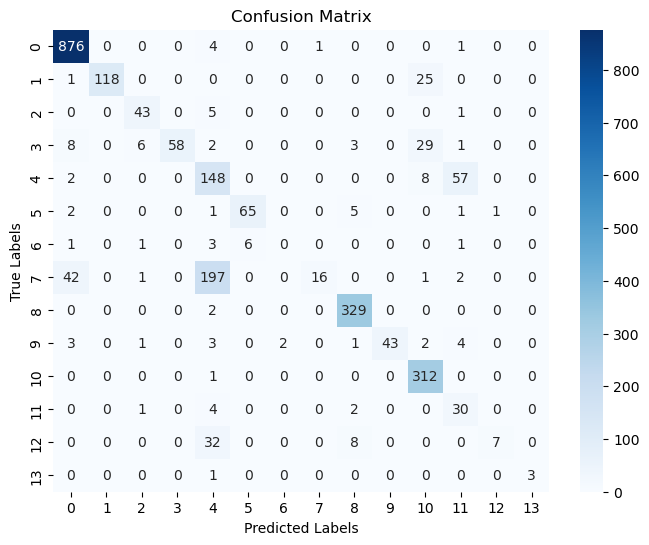

In [145]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## Plotting ROC Curve

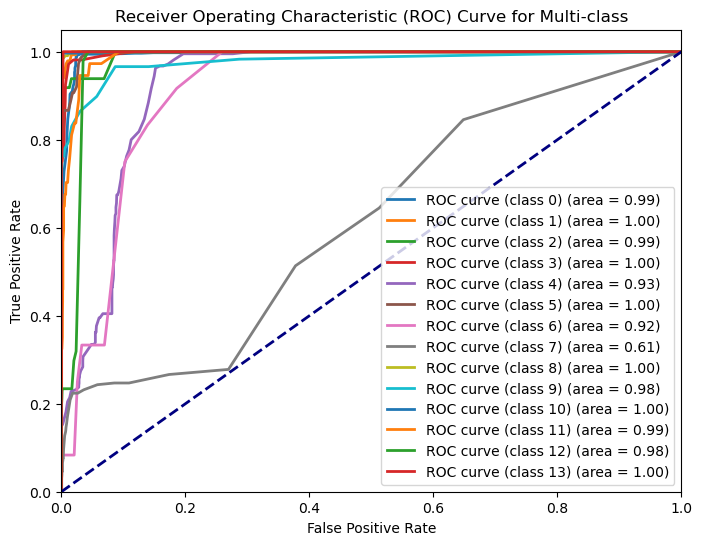

In [146]:
# Plotting ROC Curve
y_probs = rf_classifier.predict_proba(X_test_tfidf)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y_probs[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(y_probs[0])):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {}) (area = {:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class')
plt.legend(loc="lower right")
plt.show()

## Hyperparameter Tunning with Grid search

In [147]:




# Define hyperparameters grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion':['entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform hyperparameter tuning
grid_search.fit(X_train_tfidf, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train RandomForestClassifier with best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred = best_rf_classifier.predict(X_test_tfidf)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       882
           1       1.00      0.76      0.86       144
           2       0.86      0.76      0.80        49
           3       1.00      0.57      0.73       107
           4       0.41      0.71      0.52       215
           5       0.93      0.88      0.90        75
           6       0.50      0.08      0.14        12
           7       0.90      0.07      0.13       259
           8       0.87      0.99      0.93       331
           9       1.00      0.76      0.87        59
          10       0.83      1.00      0.91       313
          11       0.32      0.92      0.48        37
          12       0.55      0.13      0.21        47
          13       1.00

In [148]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.8082083662194159


#### Key Observations--
Accuracy with Hyperparameter Tunning --> 0.8082083662194159

Accuracy Without Hyperparameter Tuning -->  0.8082083662194159  

We can observe their is not much difference between the two.

#  Support Vector Machine

In [150]:
#  Applying the SVM on the training dataset
from sklearn.svm import SVC
SVMModel_ini = SVC()
SVMModel_ini.fit(X_train_tfidf,y_train)

SVC()

In [151]:
#Running the model on the test dataset
y_pred_ini = SVMModel_ini.predict(X_test_tfidf)

In [154]:
accuracy_score(y_test,y_pred_ini)

0.8397790055248618

## Confusion Matrix 

precision 1.0
recall 0.9552238805970149


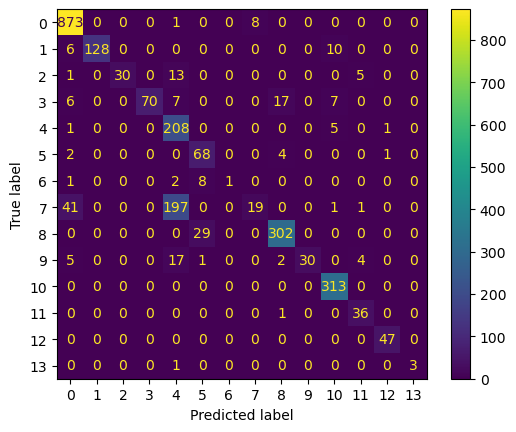

In [156]:
# create the confusion matrix
cm = confusion_matrix(y_test, y_pred_ini, labels=SVMModel_ini.classes_)
# lets get the precision and recall numbers using confusion matrix itself

CM=cm
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))
#lets display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=SVMModel_ini.classes_)

disp.plot()

### Roc curve

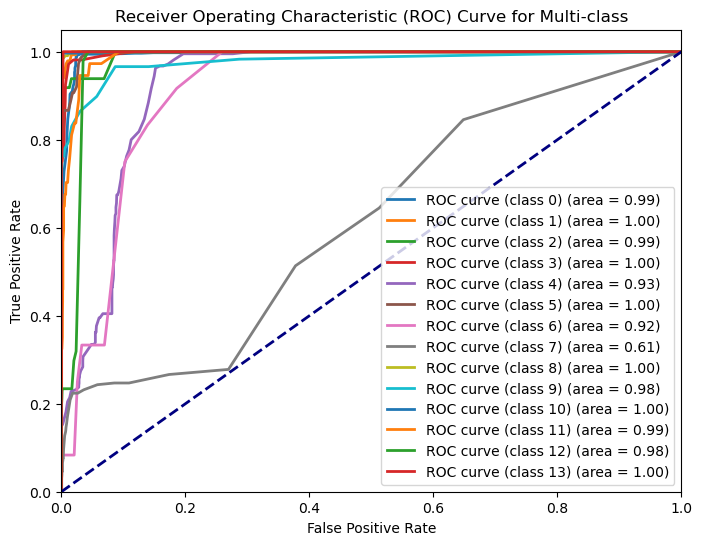

In [157]:
## Roc curve
# Plotting ROC Curve
preds =  SVMModel_ini.predict(X_test_tfidf)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y_probs[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(y_probs[0])):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {}) (area = {:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class')
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [158]:
# Classification Report
print(classification_report(y_test,SVMModel_ini.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       882
           1       1.00      0.89      0.94       144
           2       1.00      0.61      0.76        49
           3       1.00      0.65      0.79       107
           4       0.47      0.97      0.63       215
           5       0.64      0.91      0.75        75
           6       1.00      0.08      0.15        12
           7       0.70      0.07      0.13       259
           8       0.93      0.91      0.92       331
           9       1.00      0.51      0.67        59
          10       0.93      1.00      0.96       313
          11       0.78      0.97      0.87        37
          12       0.96      1.00      0.98        47
          13       1.00      0.75      0.86         4

    accuracy                           0.84      2534
   macro avg       0.88      0.74      0.74      2534
weighted avg       0.87      0.84      0.81      2534



## Hyperparameter Tunning

In [159]:
#Using Grid Search cross validation technique we will find the best value of hyper parameters - 
#Here we are finding the best kernel
from sklearn.model_selection import GridSearchCV
parameters = [ {'kernel': ['rbf','poly','sigmoid']}]
grid_search = GridSearchCV(estimator = SVMModel_ini,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train_tfidf, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [160]:
best_parameters


{'kernel': 'sigmoid'}

In [161]:
#Applying the SVM on the training dataset
from sklearn.svm import SVC
SVMModel_tuned = SVC(kernel='rbf',gamma=1, C=1)
SVMModel_tuned.fit(X_train_tfidf,y_train)

SVC(C=1, gamma=1)

In [162]:
#Running the model on the test dataset
y_pred_tuned = SVMModel_tuned.predict(X_test_tfidf)

In [163]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_tuned)

0.8397790055248618

In [166]:
##Performimg Cross validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC

## KEY OBSERVATIONS

## Accuracy with Hyperparameter Tunning --> 0.84

### Accuracy Without Hyperparameter Tuning -->  0..84

### We can observe that  Both models have same accuracy.

# XGBoost

In [172]:
# import xgboost
import xgboost as xgb
# create an XG Boost classifier
xg_reg = xgb.XGBClassifier( n_estimators = 10)

In [173]:
# Fit and predict from the model
xg_reg.fit(X_train_tfidf,y_train)

preds = xg_reg.predict(X_test_tfidf)

In [174]:
# Generate classification report
report = classification_report(y_test, preds)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       882
           1       0.99      0.95      0.97       144
           2       0.76      0.76      0.76        49
           3       0.99      0.80      0.89       107
           4       0.43      0.72      0.54       215
           5       0.88      0.93      0.90        75
           6       0.09      0.08      0.09        12
           7       0.64      0.08      0.14       259
           8       0.98      0.99      0.99       331
           9       0.91      0.86      0.89        59
          10       0.99      1.00      0.99       313
          11       0.34      0.92      0.50        37
          12       0.96      0.91      0.93        47
          13       0.80      1.00      0.89         4

    accuracy                           0.85      2534
   macro avg       0.76      0.79      0.75      2534
weighted avg       0.86      0.85      0.83      2534



In [175]:
# print the accuracy
print("Accuracy:",accuracy_score(y_test, preds))


Accuracy: 0.8464877663772692


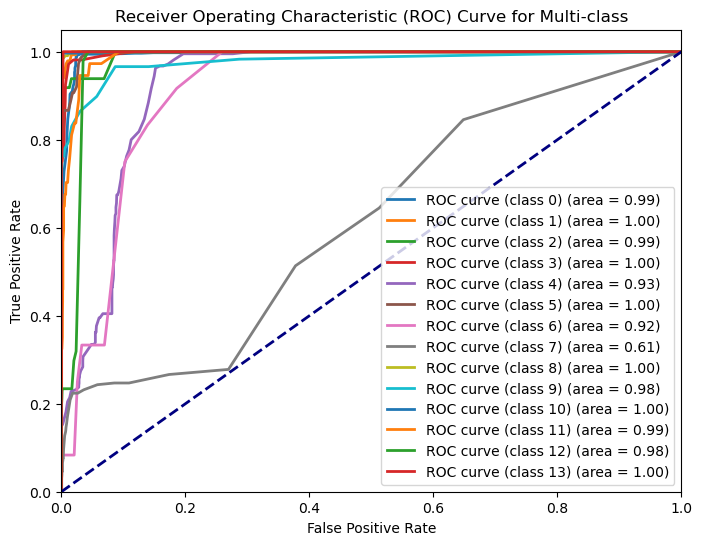

In [176]:
## Roc curve
# Plotting ROC Curve
preds = xg_reg.predict(X_test_tfidf)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y_probs[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(y_probs[0])):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {}) (area = {:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class')
plt.legend(loc="lower right")
plt.show()

In [178]:
# create the confusion matrix
cm = confusion_matrix(y_test, preds, labels=xg_reg.classes_)

In [ ]:
# lets get the precision and recall numbers using confusion matrix itself

CM=cm
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))

In [ ]:
#lets display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=xg_reg.classes_)
disp.plot()

In [ ]:
print("Accuracy:", accuracy)

## Using Cross Validation
##### Here we are using SVM model .

In [ ]:

# Initialize cross-validation iterator (example using 5-fold cross-validation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(svm_model, X_test_tfidf, y_test,
                            cv=kf)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Compute and print mean accuracy
mean_accuracy = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy)

## Conclusions


1. Dataset  has lot of imbalance like category cloth dominate the dataset , there are 70% of product with no ratings available, etc.

2.Hyperparameter Tuning has not drastically increased the accuracy and precision of the models in the given dataset.

3. XGBoost  has Achieved the highest Accuracy of the 84.6%.

4.Tf-idf vectorisation performed better than Embedding .

5. Cross validation has increase the accuracy significantly of all the models .


